<a href="https://colab.research.google.com/github/Harshitaa63/myprojects/blob/main/Anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the dataset
df = pd.read_csv("/content/creditcard.zip")

In [4]:
# Print column names to ensure we use the correct ones
print("Available columns:", df.columns)

# Select numerical features for anomaly detection
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()


Available columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
# Check if 'TransactionAmount' exists, otherwise find a matching column
expected_col = 'TransactionAmount'
if expected_col not in df.columns:
    similar_cols = [col for col in df.columns if 'amount' in col.lower()]
    expected_col = similar_cols[0] if similar_cols else numeric_columns[0]  # Fallback to the first numeric column

print(f"Using column '{expected_col}' for transaction analysis")


Using column 'Amount' for transaction analysis


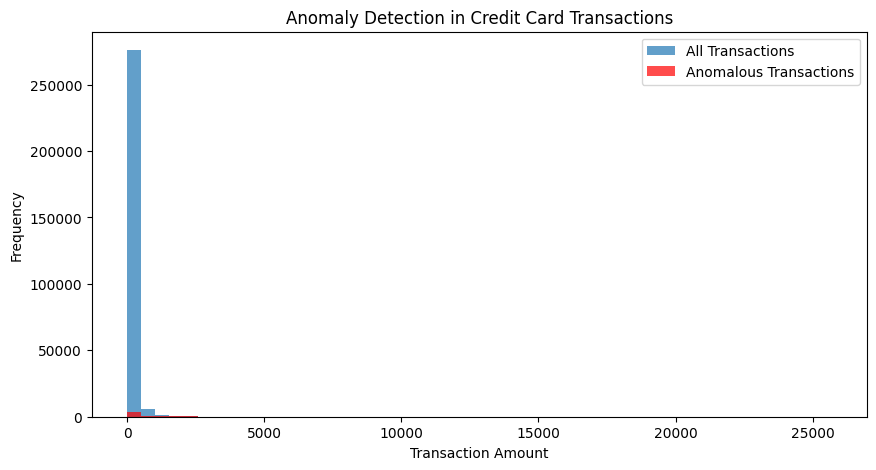

In [8]:
# Standardize the numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_columns])
# Apply Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.02, random_state=42)  # Adjust contamination level
df["anomaly"] = model.fit_predict(df_scaled)
# Mark anomalies (-1 means an outlier)
df_anomalies = df[df["anomaly"] == -1]

# Visualize detected anomalies in transaction amounts
plt.figure(figsize=(10, 5))
plt.hist(df[expected_col], bins=50, alpha=0.7, label="All Transactions")
plt.hist(df_anomalies[expected_col], bins=50, alpha=0.7, color="red", label="Anomalous Transactions")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Anomaly Detection in Credit Card Transactions")
plt.legend()
plt.show()




In [9]:

# Display detected anomalies
print("Detected Anomalies:")
print(df_anomalies)


Detected Anomalies:
            Time         V1         V2        V3        V4        V5  \
140         87.0  -5.101877   1.897022 -3.458034 -1.277543 -5.517758   
164        103.0  -6.093248 -12.114213 -5.694973  3.294389 -1.413792   
174        112.0  -4.816022  -3.345061  0.566006  3.960568 -2.495400   
225        147.0  -2.687978   4.390230 -2.360483  0.360829  1.310192   
362        266.0  -2.564961   2.470985  2.649417 -1.564256  1.794297   
...          ...        ...        ...       ...       ...       ...   
284561  172558.0  -6.491016   5.700607 -6.421237 -0.971126 -2.902874   
284631  172623.0  -5.459612   4.844512 -5.127471 -0.772816 -2.098147   
284649  172642.0 -11.946976   9.772660 -8.006237 -2.498596 -4.229520   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   

              V6        V7        V8        V9  ...       V22       V23  \
140     2.098366  3.329603  1.250966  0.